# 사이킷런으로 시작하는 머신러닝 
------


 ## [1] 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

 
 

* 사이킷런 버전 확인

In [2]:
import sklearn
print(sklearn.__version__)

0.24.1


### 붓꽃 데이터 세트로 붓꽃의 품종을 분류(Classification)하기   
 : 붓꽃 데이터 세트는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처(Feature)를 기반으로 꽃의 품종을 예측하기 위한 것이다. 
 
 * 분류는 대표적인 지도학습(Supervised Learning)방법의 하나이다.
 
 * 지도학습: 학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다. 즉, 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식이다. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

**(1) 붓꽃 데이터 세트를 로딩한 후, 피처들과 데이터 값이 어떻게 구성돼 있는지 확인하기 위해 DataFrame으로 변환하기**

In [6]:
import pandas as pd 

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환한다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


* 피처에는 sepal length, sepal width, petal length, petal width이 있다.
* 레이블은 0, 1, 2 세 가지 값으로 돼 있으며 0이 setosa 품종, 1이 versicolor 품종, 2가 virginica 품종을 의미한다.

**(2) 데이터 세트 분리 - 학습용 데이터와 테스트용 데이터로 분리하기**

 * train_test_split(): 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 분할한다.   
 예) test_size=0.2로 설정하면 전체 데이터 중 테스트 데이터가 20%, 학습 데이터가 80%로 데이터를 분할함

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                   test_size=0.2, random_state=11)

* train_test_split()의 첫 번째 파라미터인 iris_data는 피처 데이터 세트이다. 두 번째 파라미터인 iris_label은 레이블(Label) 데이터 세트이다. test_size=0.2는 전체 데이터 세트 중 테스트 데이터 세트의 비율이다. random_state는 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값이다.   
* 피처 데이터 세트를 X_train으로, 테스트용 피처 데이터 세트를 X_test로, 학습용 레이블 데이터 세트를 y_train으로, 테스트용 레이블 데이터 세트를 y_test로 반환한다. 


**(3) 모델 학습 - 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킴**

* 생성된 DecisionTreeClassifier 객체의 fit() 메서드에 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출하면 학습을 수행한다.

In [8]:
# DecisionTreeClassifier 객체 생성
df_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

**(4) 예측 수행 - 학습된 ML 모델을 이용해 테스트 데이터의 분류 예측**
* 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 하며, 일반적으로 테스트 데이터 세트를 이용한다. 
* DecisionTreeClassifier 객체의 predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환한다.

In [10]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = df_clf.predict(X_test)

**(5) 평가 - 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML 모델의 성능을 평가**
* 정확도 측정: 정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표이다.   
-->예측한 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인한다.
* accuracy_score(): 사이킷런에서 정확도 측정하는 함수
 * 첫 번째 파라미터로 실제 레이블 데이터 세트, 두 번째 파라미터로 예측 레이블 데이터 세트를 입력하면 된다.

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9333333333333333

학습한 의사 결정 트리의 알고리즘 예측 정확도가 약 0.933(93.33%)로 측정됐다.

## [2] 사이킷런의 기반 프레임워크 익히기
---
### (1) Estimator 이해 및 fit( ), predict( ) 메서드
* 사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공함
* 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭함
 * Classifier과 Regressor를 합쳐서 Estimator 클래스라고 부름
* 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부름 
* 사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출(Feature Extraction) 등을 구현한 클래스도 대부분 fit(), transform()을 적용함
 * 비지도학습과 피처 추출에서 fit()은 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다.
 * fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행함
* 사이킷런은 fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공함 





### (2) 사이킷런의 주요 모듈 
* 예제 데이터
 * sklearn.datasets: 사이킷런에 내장되어 예제로 제공하는 데이터 세트
* 피처 처리 
 * sklearn.preprocessing: 데이터 전처리에 필요한 다양한 가공 기능 제공
 * sklearn.feature_selection: 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공
 * sklearn.feature_extraction: 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨
* 피처 처리 & 차원 축소 
 * sklearn.decomposition: 차원 축소와 관련한 알고리즘을 지원하는 모듈
* 데이터 분리, 검증 & 파라미터 튜닝 
 * sklearn.model_selection: 교차 검증을 위한 학습용/테스트용 분리
* 평가
 * sklearn.metrics: 분류, 회귀, 클러스터링, 페어와이즈(Pairwise)에 대한 다양한 성능 측정 방법 제공(Accuracy, Precision, Recall, ROC-AUC, RMSE 등)
* ML 알고리즘
 * sklearn.ensemble: 앙상블 알고리즘 제공(랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등)
 * sklearn.linear_model: 주로 선형 회귀, 릿지(Ridge), 라쏘(Lasso) 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원. SGD(Stochastic Gradient Descent) 관련 알고리즘도 제공 
 * sklearn.naive_bayes: 나이브 베이즈 알고리즘 제공(가우시안 NB, 다항 분포 NB 등)
 * sklearn.neighbors: 최근접 이웃 알고리즘 제공. (K-NN 등)
 * sklearn.svm: 서포트 벡터 머신 알고리즘 제공
 * sklearn.tree: 의사 결정 트리 알고리즘 제공
 * sklearn.cluster: 비지도 클러스터링 알고리즘 제공(K-평균, 계층형, DBSCAN 등)
* 유틸리티
 * sklearn.pipeline: 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공
 
 
 
 ### (3) 내장된 예제 데이터 세트 
 * 회귀 연습용 예제 데이터
 > - datasets.load_boston(): 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트   
 > - datasets.load_diabetes(): 당뇨 데이터 세트
 
 * 분류 연습용 예제 데이터
 > - datasets.load_breast_cancer(): 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
 > - datasets.load_digits(): 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
 > - datasets.load_iris(): 붓꽃에 대한 피처를 가진 데이터 세트 
 
 * 분류와 클러스터링을 위한 표본 데이터 생성기
 > - datasets.make_classification(): 분류를 위한 데이터 세트를 만든다. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해준다.
 > - datasets.make_blobs(): 클러스터링을 위한 데이터 세트를 무작위로 생성해준다. 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만들어준다.
 
* 사이킷런에 내장된 데이터 세트는 일반적으로 딕셔너리 형태로 돼 있다.
* 개별 키가 가리키는 데이터 세트의 의미
 * data: 피처의 데이터 세트
 * target: 분류 시 레이블 값, 회귀일 때는 숫자 결과값 데이터 세트
 * target_names: 개별 레이블의 이름
 * feature_names: 피처의 이름
 * DESCR: 데이터 세트에 대한 설명과 각 피처의 설명
* 피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 Key값을 지정하면 된다.




In [12]:
from sklearn.datasets import load_iris

iris_data = load_iris()
type(iris_data)

sklearn.utils.Bunch

* Bunch 클래스는 파이썬 딕셔너리 자료형과 유사하다. 

In [13]:
keys = iris_data.keys()
keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

* 데이터 키는 피처들의 데이터 값을 가리킨다. 데이터 세트가 딕셔너리 형태이기 때문에 피처 데이터 값을 추출하기 위해서는 데이터 세트.data(또는 데이터 세트['data'])를 이용하면 된다.

In [19]:
print(type(iris_data.feature_names))
print(len(iris_data.feature_names)); print()
print(type(iris_data.target_names))
print(len(iris_data.target_names)); print()
print(type(iris_data.data))
print(iris_data.data.shape); print()
print(type(iris_data.target))
print(iris_data.target.shape); print()
print(iris_data.target)

<class 'list'>
4

<class 'numpy.ndarray'>
3

<class 'numpy.ndarray'>
(150, 4)

<class 'numpy.ndarray'>
(150,)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## [3] Model Selection 모듈 소개 
---
### (1) 학습/테스트 데이터 세트 분리 - train_test_split()
* train_test_split()는 첫 번째 파라미터로 피처 데이터 세트, 두 번째 파라미터로 레이블 데이터 세트를 입력받는다. 그리고 선택적으로 다음 파라미터를 입력받는다.

 * test_size: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. 디폴트는 0.25, 즉 25%이다.
 * train_size: 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정한다. 잘 사용되지 않음.
 * shuffle: 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정한다. 디폴트는 True이다. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용된다.
 
 * random_state: 호출할 때마다 동일한 학습/테스트용 데이터를 생성하기 위해 주어지는 난수 값이다. 
* train_test_split()의 반환값을 튜플 형태이다. 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트가 반환된다.

**붗꽃 데이터 세트를 테스트 데이터 세트를 전체의 30%로, 학습 데이터 세트를 70%로 분리하기**

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                   test_size=0.3, random_state=121)

# 학습 데이터를 기반으로 DecisionTreeClassifier을 학습하고 이 모델을 이용해 예측 정확도를 측정
df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9555555555555556


테스트 데이터로 예측을 수행한 결과 정확도가 약 95.56%이다. 붓꽃 데이터는 150개의 데이터로 데이터 양이 크지 않아 전체의 30% 정도인 테스트 데이터는 45개 정도밖에 되지 않으므로 이를 통해 알고리즘의 예측 성능을 판단하기에는 그리 적절하지 않다. 학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것도 중요하지만, 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해보는 것도 매우 중요하다. 

### (2) 교차검증
* 과적합(Overfitting): 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것을 의미한다. 그런데 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생긴다. 결국은 해당 데이터에만 과적합되는 학습 모델이 만들어져 다른 테스트용 데이터가 들어올 경우에는 성능이 저하된다. 이러한 문제점을 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행한다.   

* 교차 검증: ML은 데이터에 기반한다. 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 여러가 지그 ML에 영향을 미치는 요소를 가지고 있다. 특정 ML 알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별해 학습한다면 실제 데이터 양식과는 많은 차이가 있을 것이고 결국 성능 저하로 이어질 것이다. 교차 검증은 이러한 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다. 그리고 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있다. 

* 대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스이다. ML에 사용되는 데이터 세트를 세분화해서 학습, 검증, 테스트 데이터 세트로 나눌 수 있다. 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 뒤서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용한다.

> * **K 폴드 교차 검증**   
> 가장 보편적으로 사용되는 교차 검증 기법이다. 먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법.
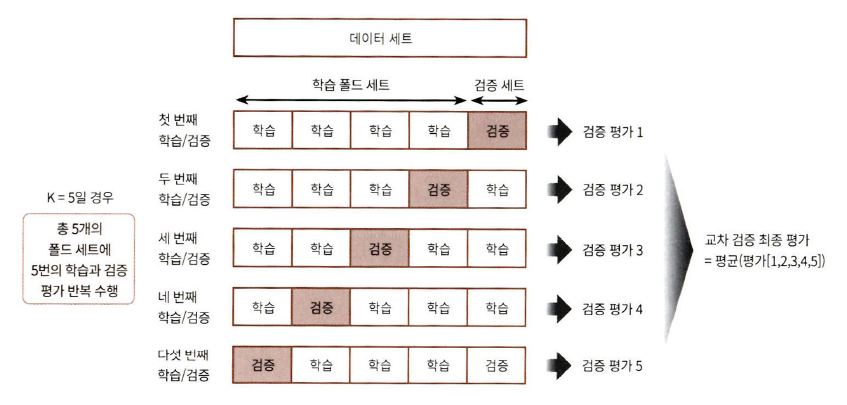
> * 사이킷런에서는 K 폴드 교차 검증 프로세스를 구현하기 위해 KFold와 StratifiedKFold 클래스를 제공한다. 


**KFold 클래스를 이용해 붓꽃 데이터 세트를 교차 검증하고 예측 정확도를 알아보기**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


* 생성된 KFold 객체의 split()을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리한다. 전체 붓꽃 데이터는 모드 150개다. 따라서 학습용 데이터 세트는 이 중 4/5인 120개, 검증 테스트 데이터 세트는 1/5인 30개로 분할된다. 
* KFold 객체는 split()을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환한다. 학습용/검증용 데이터 추출은 반환된 인덱스를 기반으로 개발 코드에서 직접 수행해야 한다.


**5개의 폴드 세트를 생성하는 KFold 객체의 split()을 호출해 교차 검증 수행 시마다 학습과 검증을 반복해 예측 정확도를 측정하고, 검증 데이터 세트의 인덱스도 추출해보기**

In [23]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


5번 교차 검증 결과 평균 검증 정확도는 0.9이다. 교차 검증 시마다 검증 세트의 인덱스가 달라진다. 검증 세트의 인덱스를 보면 교차 검증 시마다 split() 함수가 어떻게 인덱스를 할당하는지 알 수 있다. 

> * **Stratified K 폴드**      
>  - 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식이다. 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말한다.    
>  - Stratified K 폴드는 K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해 준다. 이를 위해 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다.  

**K 폴드가 가진 문제점을 확인하고 StratifiedKFold 클래스를 이용해 개선해 보기**
  - **붓꽃 데이터 세트를 DF으로 생성하고 레이블 값의 분포도 확인하기**

In [24]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

레이블 값은 0, 1, 2 값 모두 50개로 동일하다. 즉 setosa, versicolor, virginica 품종 모두 50개다. 


**우선 3개의 폴드 세트를 KFold로 생성하고, 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인하기**

In [27]:
kfold = KFold(n_splits=3)
n_iter=0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


첫 번째 교차 검증에서는 학습 레이블의 1, 2 값이 각각 50개가 추출되었고, 검증 레이블의 0값이 50개 추출되었다. 학습 레이블은 1, 2밖에 없으므로 0의 경우는 전혀 학습하지 못한다. 반대로 검증 레이블은 0밖에 없으므로 학습 모델은 절대 0을 예측하지 못한다. 이러한 유형으로 교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 될 수 밖에 없다.   

* StratifiedKFold는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결한다. 
* StratifiedKFold를 사용하는 방법은 KFold를 사용하는 방법과 거의 비슷하다. 단 하나 큰 차이는 StratifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요하다.

**동일한 데이터 분할을 StratifiedKFold로 수행하고 학습/검증 레이블 데이터의 분포도를 확인하기(폴드 세트:3개)**

In [29]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당되었다. 첫 번째 교차 검증에서 학습 레이블은 0, 1, 2 값이 각각 33개로, 레이블별로 동일하게 할당됐고 검증 레이블 역시 0, 1, 2 값이 각각 17개로, 레이블별로 동일하게 할당되었다. 

**StratifiedKFold를 이용해 붓꽃 데이터를 교차 검증하기**  


In [31]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]

## 평균 검증 정확도: 0.9666666666666667


3개의 Stratified K 폴드로 교차 검증한 결과 평균 검증 정확도가 약 96.04%로 측정됐다. 
* Stratified K 폴드의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증해야 한다. 
* 일반적으로 분류(Classification)에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할돼야 한다.
* 회귀(Regression)에서는 Stratified K 폴드가 지원되지 않는다. 회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문이다. 

> * **cross_val_score(): 간편한 교차 검증 방법**    
>  * 파라미터 설명:
>    * estimator: 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor을 의미
>    * X: 피처 데이터 세트
>    * y: 레이블 데이터 세트
>    * cv: 교차 검증폴드 수
>    * scoring: 지정된 성능 지표 측정값을 배열 형태로 반환함 
>  * cross_val_score()는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할한다.(회귀인 경우는 Stratified K 폴드 방식으로 분할할 수 없으므로 K 폴드 방식으로 분할한다.)

**cross_val_score()의 자세한 사용법 - 교차 검증 폴드 수는3, 성능 평가 지표는 accuracy로 하기**

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


* cross_val_score()는 cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결과값을 배열로 반환한다. 그리고 일반적으로 이를 평균해 평가 수치로 사용한다.
* cross_val_score() API 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation) 시켜주므로 간단하게 교차 검증을 수행할 수 있다. 
* 붓꽃 데이터의 cross_val_score() 수행 결과와 앞 예제의 붓꽃 데이터 StratifiedKFold 수행 결과를 비교해 보면 각 교차 검증별 정확도와 평균 검증 정확도가 모두 동일하다. 이는 cross_val_score()가 내부적으로 StratifiedKFold를 이용하기 때문이다.
* 비슷한 API로 cross_validate()가 있다. cross_val_score()는 단 하나의 평가 지표만 가능하지만 cross_validate()는 여러 개의 평가 지표를 반환할 수 있다. 또한 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공된다. 

### (3) GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
* 하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다.
* 사이킷런은 GridSearchCV API를 이용해 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다.  



예) 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고의 성능을 가지는 파라미터 조합을 찾기


In [33]:
grid_parameters = {'max_depth': [1, 2, 3], 
                   'min_samples_split': [2, 3]}

* GridSearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다. 즉, 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해준다.


* GridSearchCV는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만 동시에 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸린다.


* GridSearchCV 클래스의 주요 파라미터:
 * estimator: classifier, regressor, pipeline이 사용될 수 있다.
 * param_grid: key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정한다.
 * scoring: 예측 성능을 측정할 평가 방법을 지정한다.
 * cv: 교차 검증을 위해 분할되는 학습/테스트 세트의 개수를 지정한다.
 * refit: 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.

**결정 트리 알고리즘의 여러 가지 최적화 파라미터를 순차적으로 적용해 붓꽃 데이터를 예측 분석하는 데 GridSearchCV를 이용하기**   

In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                   test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

## 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

1) 학습 데이터 세트를 GridSearchCV 객체의 fit(학습 데이터 세트) 메서드에 인자로 입력한다.     
2) GridSearchCV 객체의 fit(학습 데이터 세트) 메서드를 수행하면 학습 데이터를 cv에 기술된 폴딩 세트로 분할해 param_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 cv_results_ 속성에 기록한다.     
3) cv_results_는 gridsearchcv의 결과 세트로서 딕셔너리 형태로 key 값과 리스트 형태의 value 값을 가진다.cv_results_를 Pandas의 DF로 변환하면 내용을 좀 더 쉽게 볼 수 있다.


In [35]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DF로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
          'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


이 6개의 결과는 하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 총 6번 변경하면서 학습 및 평가를 수행했음을 나타낸 것이다. 위 결과의 'params'칼럼에는 수행할 때마다 적용된 하이퍼 파라미터값을 가지고 있다.   

맨 마지막에서 두 번째 행을 보면 'rank_test_score'칼럼 값이 1이다. 이는 해당 파라미터의 조합인 max_depth:3, min_samples_split:2로 평가한 결과 예측 성능이 1위라는 의미이다. 그때의 mean_test_score 칼럼 값을 보면 0.966667로 가장 높다.   

맨 마지막 행도 rank_test_score값이 1인데, mean_test_score 값이 0.966667로 공동 1위라는 의미이다.    

* split0_test_score, split1_test_score, split2_test_score는 CV가 3인 경우, 즉 3개의 폴딩 세트에서 각각 테스트한 성능 수치이다. mean_test_score는 이 세 개의 성능 수치를 평균한 것이다.


* 주요 칼럼별 의미 정리:
 * params: 수행할 때마다 적용된 개별 하이퍼 파라미터 값을 나타낸다.
 * rank_test_score: 하이퍼 파라미터별로 성능이 좋은 score 순위를 나타낸다. 1이 가장 뛰어난 순위이며 이때의 파라미터가 최적의 하이퍼 파라미터이다.
 * mean_test_score: 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값이다. 


* GridsearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_.best_score_ 속성에 기록된다.(즉, cv_results_의 rank_test_score가 1일 때의 값이다.)   

**최적 하이퍼 파라미터의 값과 그때의 정확도 알아보기**

In [36]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


max_depth가 3, min_samples_split 2일 때 검증용 폴드 세트에서 평균 최고 정확도가 96.67%로 측정됐다.
* GridSearchCV 객체의 생성 파라미터로 refit=True가 디폴트이다. refit=True이면 GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장한다.

**이미 학습된 best_estimator_를 이용해 앞에서 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측하고 성능을 평가하기**

In [37]:
# GridSearchCV의 refit으로 이미 학습된 estimator를 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667


별도의 테스트 데이터 세트로 정확도를 측정한 결과 약 96.67%의 결과가 도출됐다. 
* 일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법이다.

## [4] 데이터 전처리
---
사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않는다. 그래서 모든 문자열 값은 인코딩돼서 숫자형을 변화해야 한다. 


### (1) 데이터 인코딩 
> * **레이블 인코딩(Label encoding)**:     
>  카테고리 피처를 코드형 숫자 값으로 변환하는 것
>  * 사이킷런의 레이블 인코딩은 LabelEncoder 클래스로 구현한다.
>  * LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩을 수행한다.
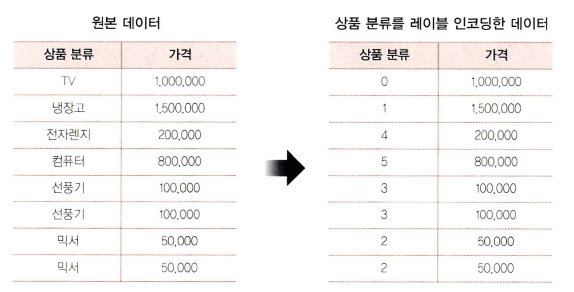

In [38]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


TV는 0, 냉장고는 1, 전자레인지는 4, 컴퓨터는 5, 선풍기는 3, 믹서는 2로 변환됐다. 
* 문자열 값이 어떤 숫자 값으로 인코딩됐는지 확인하려면 LabelEncoder 객체의 classes_ 속성값으로 확인하기

In [39]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


* classes_ 속성은 0부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있다. 
* inverse_transform()을 통해 인코딩된 값을 다시 디코딩할 수 있다.

In [40]:
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


* 레이블 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다. 하지만 레이블 인코딩이 일괄적인 숫자 값으로 변환되면 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있다. 이는 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문이다. 즉, 냉장고가 1, 믹서가 2로 변환되면, 1보다 2가 더 큰 값이므로 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생한다. 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 한다. 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별문제가 없다. 
* 원-핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩 방식이다.


> * **원-핫 인코딩(One-Hot Encoding)**:       
> 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다. 즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.
> * 원-핫 인코딩은 사이킷런에서 OneHotEncoder 클래스로 쉽게 변환이 가능하다. 단, OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환되야하고, 입력 값으로 2차원 데이터가 필요하다
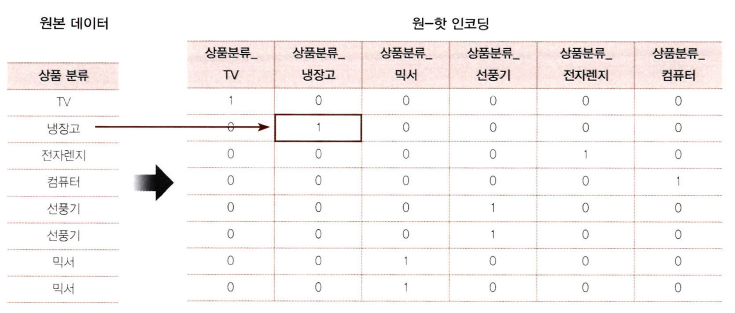

In [41]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환한다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환한다.
labels = labels.reshape(-1, 1)

# 원-핫 인코딩을 적용한다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


8개의 레코드와 1개의 칼럼을 가진 원본 데이터가 8개의 레코드와 6개의 칼럼을 가진 데이터로 변환됐다. 첫 번째 칼럼이 TV, 두 번째 칼럼이 냉장고, 세 번째 칼럼이 믹서, 네 번째 칼럼이 선풍기, 다섯 번째 칼럼이 전자레인지, 여섯 번째 칼럼이 컴퓨터를 나타낸다. 


* 판다스에서 원-핫 인코딩을 더 쉽게 지원하는 API: **get_dummies() 이용**
 * OneHotEncoder와 다르게 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환할 수 있다.

In [42]:
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


* get_dummies()를 이용하면 숫자형 값으로 변환 없이도 바로 변환이 가능하다.

### (2) 피처 스케일링과 정규화 
* 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 한다. 
 * 대표적인 방법으로 표준화(Standardization)와 정규화(Normalization)이 있다.
> * **표준화: 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것**  
> 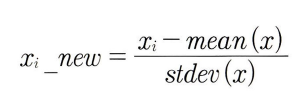
> * **정규화: 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념**
> 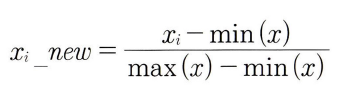
> * 사이킷런의 전처리에서 제공하는 Normalizer 모듈은 일반적인 정규화와는 약간의 차이가 있다. 사이킷런의 Normalizer 모듈은 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것을 의미한다. 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠준다.
> 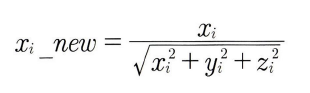

### 피처 스케일링 클래스 
### (1) StandardScaler
* StandardScaler는 앞에서 설명한 표준화를 쉽게 지원하기 위한 클래스이다. 즉, 개별 피처를 평균이 0이고, 분산이 1인 값으로 변환해준다. 

In [43]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DF으로 변환한다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


**StandardScaler를 이용해 각 피처를 한 번에 표준화해 변환하기** 
* StandardScaler 객체를 생성한 후에 fit()과 transform() 메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 간단하게 변환됨.
* transform()을 호출할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray이므로 이를 DF로 변환해 평균값과 분산 값을 다시 확인해보기

In [44]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DF로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환됐다.

### (2) MinMaxScaler
* MinMaxScaler는 데이터값을 0과 1 사이의 범위의 값으로 변환환다.(음수 값이 있으면 -1에서 1값으로 변환한다.)
* 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해 볼 수 있다.

In [45]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DF으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature 들의 최댓값')
print(iris_df_scaled.max())

feature 들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됐다.

### (3) 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
* StandardScaler나 MinMaxScaler와 같은 Scaler 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용한다. 일반적으로 fit()은 데이터 변환을 위한 기준 정보 설정(예를 들어 데이터 세트의 최댓값/최솟값 설정 등)을 적용하며 transform()은 이렇게 설정된 정보를 이용해 데이터를 변환한다. 그리고 fit_transform()은 fit()과 transform()을 한번에 적용하는 기능을 수행한다.


* 그런데 학습 데이터 세트와 테스트 데이터 세트에 이 fit()과 transform()을 적용할 때 주의가 필요하다. Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다. 즉, 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다. 



* 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 한다. 따라서 테스트 데이터에서 다시 fit()을 적용해서는 안되며 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야한다. 



* 이렇게 학습과 테스트 데이터에 fit()과 transform()을 적용할 때 주의 사항이 발생하므로 학습과 테스트 데이터 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 더 바람직하다.



#### 학습 데이터와 테스트 데이터의 fit(), transform(), fit_transform()을 이용해 스케일링 변환 시 유의할 점 
1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리     
2. 1이 여의치 않다면 테스트 데이터 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환
